# Предсказание стартапов

**Цель проекта:**

- Разработать модель машинного обучения для предсказания продолжения деятельности стартапа.
- Провести полноценный разведочный анализ и сформировать рекомендации будущим создателям стартапов (какие факторы влияют на успешность стартапа).

Задачи проекта:

1. Загрузка и ознакомление с данными
2. Предварительная обработка
3. Полноценный разведочный анализ
4. Разработка новых синтетических признаков
5. Проверка на мультиколлинеарность
6. Отбор финального набора обучающих признаков
7. Выбор и обучение моделей
8. Итоговая оценка качества предсказания лучшей модели
9. Анализ важности ее признаков
10. Подготовка отчета по исследованию

Данные о стартапах находятся в файлах:

- `###.csv`
- `###.csv`

В датасетах содержатся следующие признаки:

- `name` - Название стартапа
- `category_list` - Список категорий, к которым относится стартап
- `funding_total_usd` - Общая сумма финансирования в USD
- `status` - Статус стартапа (закрыт или действующий)
- `country_code` - Код страны
- `state_code` - Код штата
- `region` - Регион
- `city` - Город
- `funding_rounds` - Количество раундов финансирования
- `founded_at` - Дата основания
- `first_funding_at` - Дата первого раунда финансирования
- `last_funding_at` - Дата последнего раунда финансирования
- `closed_at` - Дата закрытия стартапа (если применимо)
- `lifetime` - Время существования стартапа в днях
- `status` - Целевой признак. Для каждого стартапа необходимо предсказать категориальное значение соответствующее прогнозу `operating`, `closed`. Временной период - `1970-01-01` по `2018-01-01`. Дата формирования выгрузки - `2018-01-01`.


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1">Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1">Вывод</a></span></li></ul></li><li><span><a href="#Предварительная-обработка" data-toc-modified-id="Предварительная-обработка-2">Предварительная обработка</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1">Вывод</a></span></li></ul></li><li><span><a href="#Разведочный-анализ" data-toc-modified-id="Разведочный-анализ-3">Разведочный анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1">Вывод</a></span></li></ul></li><li><span><a href="#Разработка-новых-синтетических-признаков" data-toc-modified-id="Разработка-новых-синтетических-признаков-4">Разработка новых синтетических признаков</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1">Вывод</a></span></li></ul></li><li><span><a href="#Проверка-на-мультиколлинеарность" data-toc-modified-id="Проверка-на-мультиколлинеарность-5">Проверка на мультиколлинеарность</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1">Вывод</a></span></li></ul></li><li><span><a href="#Отбор-финального-набора-обучающих-признаков" data-toc-modified-id="Отбор-финального-набора-обучающих-признаков-6">Отбор финального набора обучающих признаков</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.1">Вывод</a></span></li></ul></li><li><span><a href="#Выбор-и-обучение-моделей" data-toc-modified-id="Выбор-и-обучение-моделей-7">Выбор и обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.1">Вывод</a></span></li></ul></li><li><span><a href="#Итоговая-оценка-качества-предсказания-лучшей-модели" data-toc-modified-id="Итоговая-оценка-качества-предсказания-лучшей-модели-8">Итоговая оценка качества предсказания лучшей модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-8.1">Вывод</a></span></li></ul></li><li><span><a href="#Анализ-важности-признаков-лучшей-модели" data-toc-modified-id="Анализ-важности-признаков-лучшей-модели-9">Анализ важности признаков лучшей модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-9.1">Вывод</a></span></li></ul></li><li><span><a href="#Итоговая-таблица-с-предсказаниями" data-toc-modified-id="Итоговая-таблица-с-предсказаниями-10">Итоговая таблица с предсказаниями</a></span></li><li><span><a href="#Отчет-по-исследованию" data-toc-modified-id="Отчет-по-исследованию-11">Отчет по исследованию</a></span></li></ul></div>

## Загрузка данных

In [ ]:
pip check

pyspark 3.0.2 has requirement py4j==0.10.9, but you have py4j 0.10.9.3.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip list | grep numpy
!pip list | grep pandas
!pip list | grep matplotlib
!pip list | grep scikit-learn
!pip list | grep seaborn
!pip list | grep shap
!pip list | grep phik

numpy                             1.26.4
pandas                            2.2.3
matplotlib                        3.9.4
matplotlib-inline                 0.1.2
scikit-learn                      1.6.1
seaborn                           0.13.2
shap                              0.45.0
phik                              0.12.4


In [ ]:
!pip install numpy==1.26.4 pandas==2.2.3 matplotlib==3.9.4 matplotlib-inline==0.1.2 pyarrow==14.0.2 seaborn==0.13.2 scikit-learn==1.6.1 shap==0.45.0 phik

In [ ]:
import pandas as pd
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from phik import report
from phik.report import correlation_report, plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelEncoder,
    FunctionTransformer)
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
import shap
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [ ]:
startups_train = pd.read_csv('###.csv')
startups_test = pd.read_csv('###.csv')

In [ ]:
# Функция для получения общей информации о датасете
def get_info(data):
    display(data.head())
    print('')
    display(data.info())
    print('')
    display(data.describe().T)
    print('')
    print('Количество явных дубликатов:', data.duplicated().sum())
    print('Количество пропусков:\n', data.isna().sum())

In [ ]:
get_info(startups_train)

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


None

,count,mean,std,min,25%,50%,75%,max
funding_total_usd,42447.0,1.824748e+07,1.871173e+08,1.0,336027.5,2000000.0,10000000.0,3.007950e+10
funding_rounds,52516.0,1.740670e+00,1.374522e+00,1.0,1.0,1.0,2.0,1.900000e+01



Количество явных дубликатов: 0
Количество пропусков:
 name                     1
category_list         2465
funding_total_usd    10069
status                   0
country_code          5502
state_code            6763
region                6359
city                  6359
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
closed_at            47599
dtype: int64


В таблице 52516 строк и 13 столбцов. Во всех столбцах кроме `funding_rounds`, `founded_at`, `first_funding_at` и `last_funding_at` есть пропущеные значения. Необходимо изменить типы данных в столбцах `founded_at`, `first_funding_at`, `last_funding_at` и `closed_at` на `datetime64`.

In [ ]:
get_info(startups_test)

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


None

,count,mean,std,min,25%,50%,75%,max
funding_total_usd,10547.0,1.654910e+07,9.217283e+07,1.0,320000.0,2000000.0,10000000.0,4.715000e+09
funding_rounds,13125.0,1.714438e+00,1.318800e+00,1.0,1.0,1.0,2.0,1.500000e+01
lifetime,13125.0,3.097610e+03,2.128357e+03,52.0,1726.0,2526.0,3866.0,1.716700e+04



Количество явных дубликатов: 0
Количество пропусков:
 name                    0
category_list         591
funding_total_usd    2578
country_code         1382
state_code           1695
region               1589
city                 1587
funding_rounds          0
first_funding_at        0
last_funding_at         0
lifetime                0
dtype: int64


### Вывод

В таблице 13125 строк и 11 столбцов. Во всех столбцах кроме `name`, `funding_rounds`, `first_funding_at`, `last_funding_at` и `lifetime` есть пропущеные значения. Необходимо изменить типы данных в столбцах `first_funding_at` и `last_funding_at` на `datetime64`.

## Предварительная обработка

Переведем даты в формат `datetime`.

In [ ]:
def convert_to_datetime(df, columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column], format='%Y-%m-%d', errors='coerce')
    return df

In [ ]:
startups_train = convert_to_datetime(startups_train, ['founded_at',
                                                      'closed_at',
                                                      'first_funding_at',
                                                      'last_funding_at'])
startups_test = convert_to_datetime(startups_test, ['first_funding_at', 'last_funding_at'])

Посмотрим число уникальных значений параметра `category_list`.

In [ ]:
print('Количество уникальных категорий в датасете startups_train:', startups_train['category_list'].nunique())
print('Количество уникальных категорий в датасете startups_test:', startups_test['category_list'].nunique())

Количество уникальных категорий в датасете startups_train: 22105
Количество уникальных категорий в датасете startups_test: 6206


Параметр `category_list` содержит 22195 уникальных значений в `startups_train` и 6206 в `startups_test`. Категория стартапа может быть весомым признаком при обучении модели, поэтому важно решить задачу обобщения `category_list`.

In [ ]:
# Функция для обработки столбца category_list
def process_category_list(df):
    # Разделяем категории и создаем список всех категорий
    all_categories = []
    for categories in df['category_list'].dropna():
        all_categories.extend(categories.split('|'))

    # Считаем частоту каждой категории
    category_counts = Counter(all_categories)

    # Функция для выбора самой частой категории из списка категорий строки
    def get_most_common_category(category_str):
        if pd.isna(category_str):
            return None
        categories = category_str.split('|')
        # Выбираем категорию с максимальной частотой из category_counts
        return max(categories, key=lambda x: category_counts.get(x, 0))

    # Заменяем значения в столбце category_list
    df['category_list'] = df['category_list'].apply(get_most_common_category)
    return df

In [ ]:
# Обрабатываем каждый датасет
startups_train = process_category_list(startups_train)
startups_test = process_category_list(startups_test)

# Выводим результат
print('Количество уникальных категорий в датасете startups_train:', startups_train['category_list'].nunique())
print('Количество уникальных категорий в датасете startups_test:', startups_test['category_list'].nunique())

Количество уникальных категорий в датасете startups_train: 521
Количество уникальных категорий в датасете startups_test: 345


Посмотрим характер пропусков в признаке `closed_at`.

In [ ]:
startups_train.query('status == "operating" and closed_at != closed_at')['status'].count()

47599

Все 47599 пропусков признака `closed_at` относятся к к действующим стартапам на момент выгрузки данных. Сам по себе признак`closed_at` не информативен для предсказания продолжительности деятельности стартапов, заменим его и признак `founded_at` на признак `lifetime`. Для действующих стартапов признак `lifetime` расчитаем по дате формирования выгрузки `2018-01-01`.

In [ ]:
# Заполнение пропусков в closed_at на дату 2018-01-01
startups_train['closed_at'].fillna(pd.to_datetime('2018-01-01'), inplace=True)

# Вычисление lifetime как разницы между closed_at и founded_at
startups_train['lifetime'] = (startups_train['closed_at'] - startups_train['founded_at']).dt.days

# Удаление столбцов closed_at, 'founded_at'
startups_train.drop(columns=['closed_at', 'founded_at'], inplace=True)

# Вывод результата
startups_train

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Lunchgate,Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2011-05-01,2014-12-01,2998
1,EarLens,Manufacturing,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2010-05-04,2014-02-25,4748
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2012-08-20,2014-07-02,4383
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2011-09-01,2014-07-18,5114
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2012-02-01,2012-02-01,2791
...,...,...,...,...,...,...,...,...,...,...,...,...
52511,Videostream,Entertainment,NaN,operating,CAN,ON,Toronto,Kitchener,1,2014-03-01,2014-03-01,2192
52512,Hello Curry,Hospitality,500000.0,operating,IND,2,Hyderabad,Hyderabad,1,2014-03-07,2014-03-07,1590
52513,Taskforce,Messaging,50000.0,operating,USA,CA,SF Bay Area,San Francisco,3,2009-06-14,2011-01-01,2741
52514,NetScaler,Security,13000000.0,operating,USA,CA,SF Bay Area,San Jose,6,1998-11-30,2004-03-01,7336


In [ ]:
startups_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52515 non-null  object        
 1   category_list      50051 non-null  object        
 2   funding_total_usd  42447 non-null  float64       
 3   status             52516 non-null  object        
 4   country_code       47014 non-null  object        
 5   state_code         45753 non-null  object        
 6   region             46157 non-null  object        
 7   city               46157 non-null  object        
 8   funding_rounds     52516 non-null  int64         
 9   first_funding_at   52516 non-null  datetime64[ns]
 10  last_funding_at    52516 non-null  datetime64[ns]
 11  lifetime           52516 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(7)
memory usage: 4.8+ MB


In [ ]:
startups_train['funding_total_usd'] = startups_train['funding_total_usd'].astype('float32')
startups_train['lifetime'] = startups_train['lifetime'].astype('int32')
startups_train['funding_rounds'] = startups_train['funding_rounds'].astype('int32')

startups_test['funding_total_usd'] = startups_test['funding_total_usd'].astype('float32')
startups_test['lifetime'] = startups_test['lifetime'].astype('int32')
startups_test['funding_rounds'] = startups_test['funding_rounds'].astype('int32')

Посмотрим характер пропусков в географических параметрах.

In [ ]:
display(startups_train.query('country_code != country_code and city == city')['status'].count())
display(startups_train.query('country_code != country_code and state_code == state_code')['status'].count())
startups_train.query('country_code != country_code and region == region')['status'].count()

0

0

0

In [ ]:
display(startups_test.query('country_code != country_code and city == city')['name'].count())
display(startups_test.query('country_code != country_code and state_code == state_code')['name'].count())
startups_test.query('country_code != country_code and region == region')['name'].count()

0

0

0

У проектов с пропусков в `country_code` также отсутствуют данные в признаках региона и города. Данные пропуски восстановить невозможно.

Отсутствующие значения признака `funding_total_usd` могут означать, что стартап вообще не собрал средств. Однако, в колонке `funding_rounds` нет пропусков и нет значений 0, т.е. как минимум единожды стартапы были проинвестированы. Поэтому заменим пропуски средним значением, сгруппированным по признаку `funding_rounds`.

In [ ]:
def fill_missing_funding(df):
    df['funding_total_usd'] = df.groupby('funding_rounds')['funding_total_usd'].transform(lambda x: x.fillna(x.mean()))
    return df

In [ ]:
# Применяем функцию к каждому датасету
startups_train = fill_missing_funding(startups_train)
startups_test = fill_missing_funding(startups_test)

In [ ]:
startups_train.isna().sum()

name                    1
category_list        2465
funding_total_usd       0
status                  0
country_code         5502
state_code           6763
region               6359
city                 6359
funding_rounds          0
first_funding_at        0
last_funding_at         0
lifetime                0
dtype: int64

In [ ]:
startups_test.isna().sum()

name                    0
category_list         591
funding_total_usd       0
country_code         1382
state_code           1695
region               1589
city                 1587
funding_rounds          0
first_funding_at        0
last_funding_at         0
lifetime                0
dtype: int64

Оставшиеся пропуски параметров `name`, `category_list`, `country_code`, `state_code`, `region` и `city` заполним заглушкой.

In [ ]:
def fill_missing_values(df, placeholder):
    return df.fillna(placeholder)

In [ ]:
startups_train = fill_missing_values(startups_train, "unknown")
startups_test = fill_missing_values(startups_test, "unknown")

In [ ]:
startups_train.isna().sum()

name                 0
category_list        0
funding_total_usd    0
status               0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
first_funding_at     0
last_funding_at      0
lifetime             0
dtype: int64

In [ ]:
startups_test.isna().sum()

name                 0
category_list        0
funding_total_usd    0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
first_funding_at     0
last_funding_at      0
lifetime             0
dtype: int64

### Вывод

- Уникальные значения параметра `category_list` сократили с 22195 и 6206 до 521 и 345 соответственно, путем вывода основной категории стартапа.
- Признаки `closed_at` и `founded_at` заменили на признак `lifetime`.
- В `funding_total_usd` заполнили пропуски средним значением, сгруппированным по признаку `funding_rounds`.
- Пропуски параметров `name`, `category_list`, `country_code`, `state_code`, `region и city` заполнили заглушкой.

## Разведочный анализ

Построим гистограммы для количественных признаков.

In [ ]:
def hist_box(df, column):
    plt.figure(figsize=(15, 5))

    # Количество интервалов (bins) будет рассчитано как квадратный корень из числа наблюдений
    num_bins = int(np.sqrt(len(df[column])))

    # Гистограмма
    plt.subplot(1, 2, 1)
    plt.xlabel(f'Значения столбца "{column}"')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма для "{column}"')
    sns.histplot(df[column], bins=num_bins)  # Используем количество интервалов num_bins

    # Диаграмма размаха
    plt.subplot(1, 2, 2)
    plt.xlabel(f'Значения столбца "{column}"')
    plt.title(f'Диаграмма размаха для "{column}"')
    sns.boxplot(x=df[column])

    plt.tight_layout()
    plt.show()

In [ ]:
def subplot(df, column):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 2)
    plt.title(f'Столбчатая диаграмма для {column}')
    sns.countplot(data=df, x=column, palette='viridis')
    plt.xlabel(f'{column}')
    plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()

In [ ]:
#создание списка количественных столбцов датасета
num_col = ['funding_total_usd',
           'first_funding_at',
           'last_funding_at',
           'lifetime']

#создание списка дискретных столбцов датасета
discret_col = ['funding_rounds']

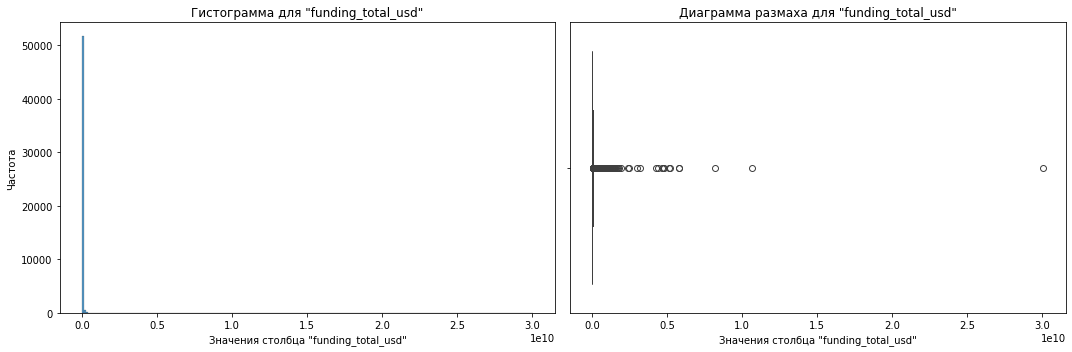

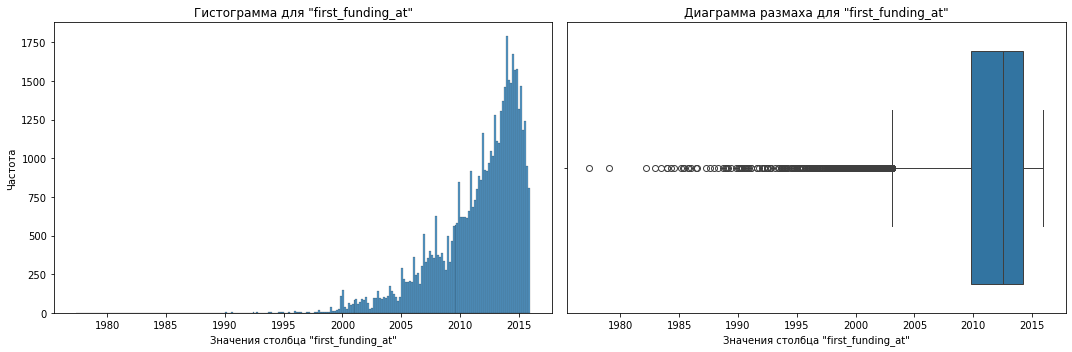

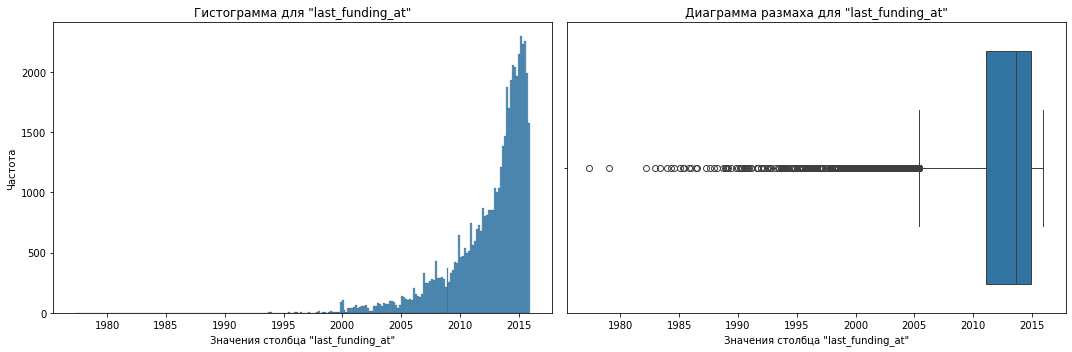

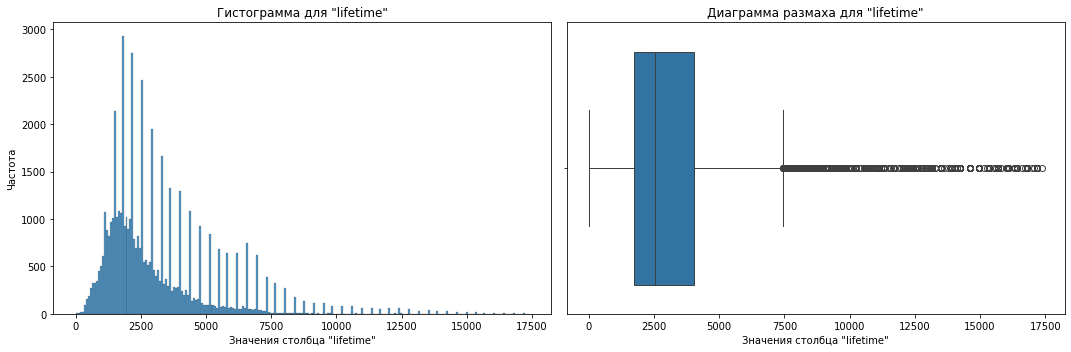

In [ ]:
for name in num_col:
    hist_box(startups_train, name)

Имеются выбросы, рассмотрим гистограммы без выбросов.

In [ ]:
def hist_box(df, column):
    plt.figure(figsize=(15, 5))

    # Определение границ для выбросов
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Фильтрация данных без выбросов
    filtered_df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

    # Количество интервалов (bins) будет рассчитано как квадратный корень из числа наблюдений
    num_bins = int(np.sqrt(len(filtered_df[column])))

    # Гистограмма
    plt.subplot(1, 2, 1)
    plt.xlabel(f'Значения столбца "{column}"')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма для "{column}" (без выбросов)')
    sns.histplot(filtered_df[column], bins=num_bins)  # Используем количество интервалов num_bins

    # Диаграмма размаха
    plt.subplot(1, 2, 2)
    plt.xlabel(f'Значения столбца "{column}"')
    plt.title(f'Диаграмма размаха для "{column}" (без выбросов)')
    sns.boxplot(x=filtered_df[column])

    plt.tight_layout()
    plt.show()

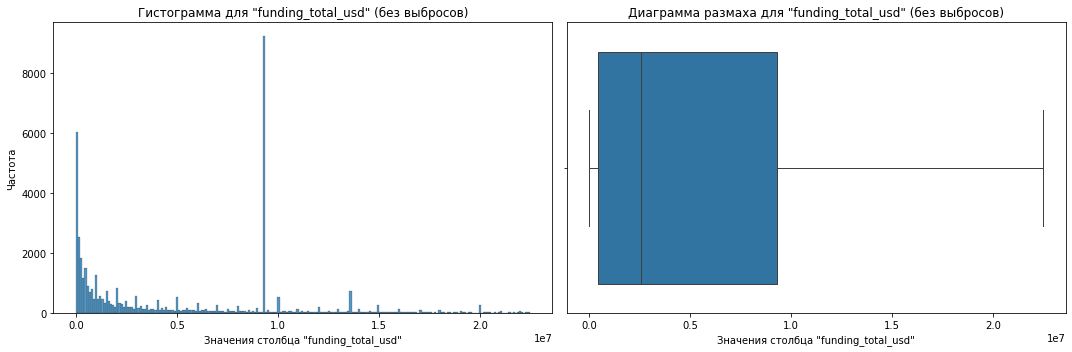

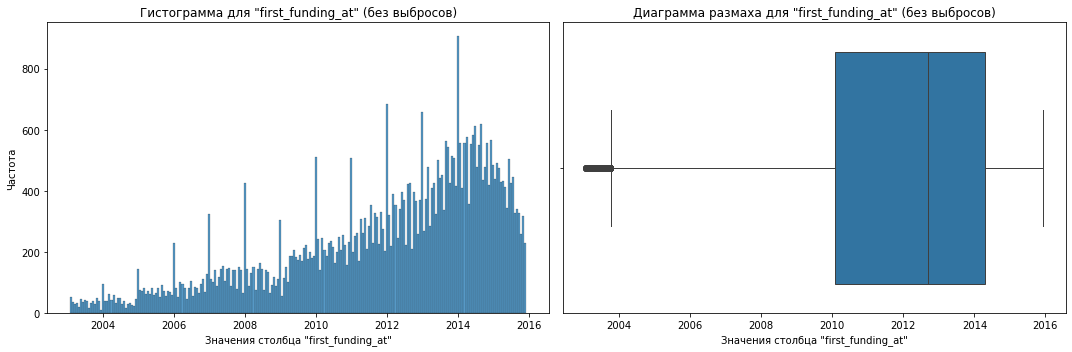

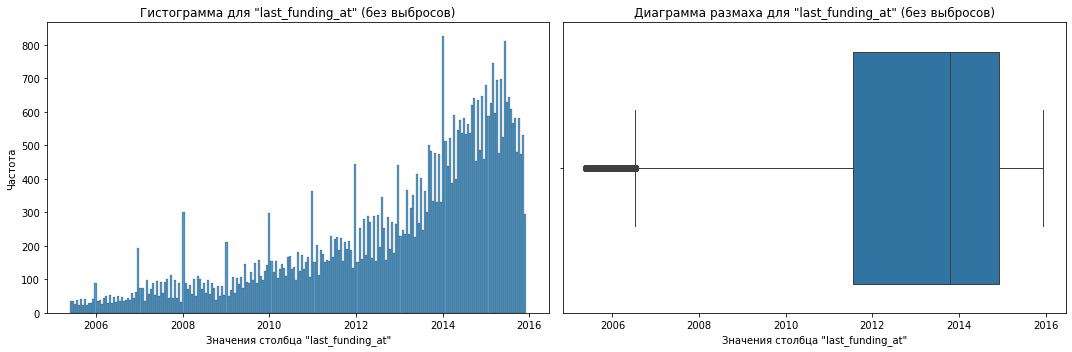

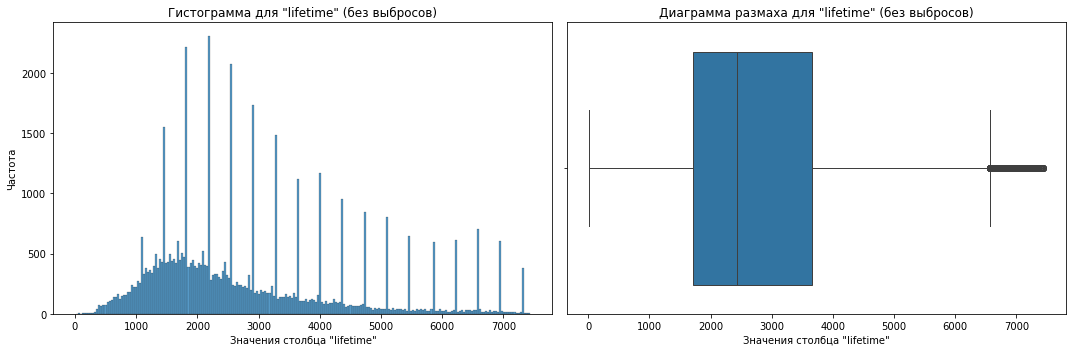

In [ ]:
for name in num_col:
    hist_box(startups_train, name)

- Распределение признака общая сумма финансирования в USD показывает, что большинство стартапов получили относительно небольшие суммы финансирования, так как плотность значений сконцентрирована около нуля. Это указывает на значительную долю стартапов с низким уровнем привлеченных средств, что часто характерно для компаний на ранних стадиях развития. На графике наблюдаются редкие высокие значения, свидетельствующие о небольшом числе стартапов, получивших крупные инвестиции.
- Из рассмотрения года первого и последнего финансирования видно, что в датасете преимущественно представлены стартапы, открывшиеся и финансировавшиеся после 2012 года.
- Распределение времени существования стартапов (`lifetime`) показывает, что большинство стартапов имеют продолжительность жизни менее 2500 дней (около 7 лет). Пик плотности приходится на стартапы с относительно коротким сроком существования, что может указывать на высокую частоту закрытия на ранних этапах. Долгоживущие стартапы встречаются реже, а их распределение плавно уменьшается с увеличением времени жизни.

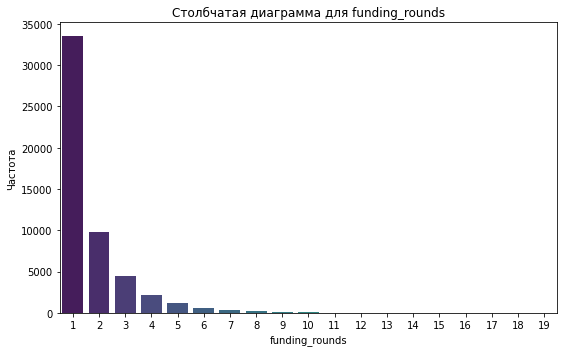

In [ ]:
#построение распределений дискретных признаков датасета
for name in discret_col:
    subplot(startups_train, name)

- Распределение количества раундов финансирования (`funding_rounds`) показывает, что большинство стартапов в тренировочном и тестовом наборах имеют менее пяти раундов. Пик плотности приходится на 1–3 раунда, что может указывать на то, что многие стартапы либо закрываются, либо достигают стабильности после нескольких раундов финансирования.

In [ ]:
categorical_columns = ['category_list', 'status', 'country_code', 'state_code', 'region', 'city']

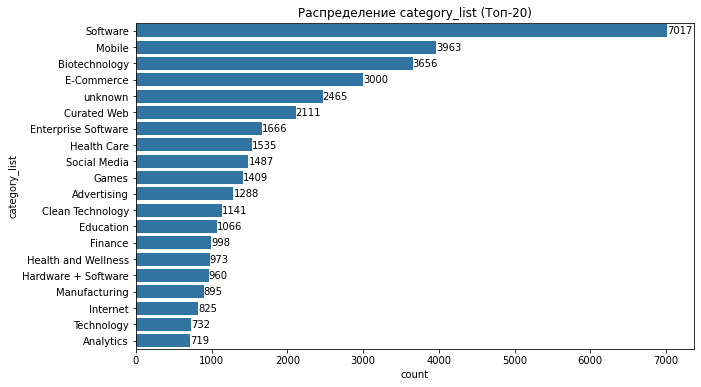

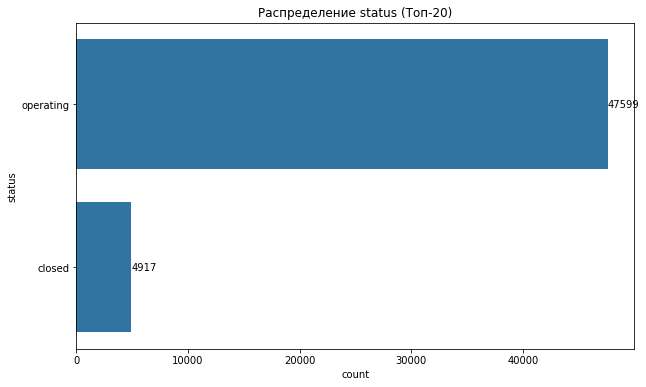

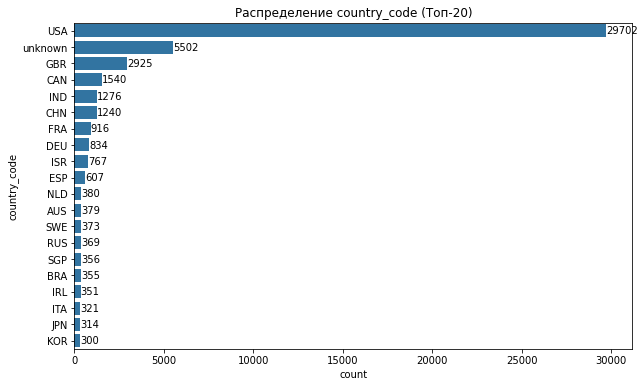

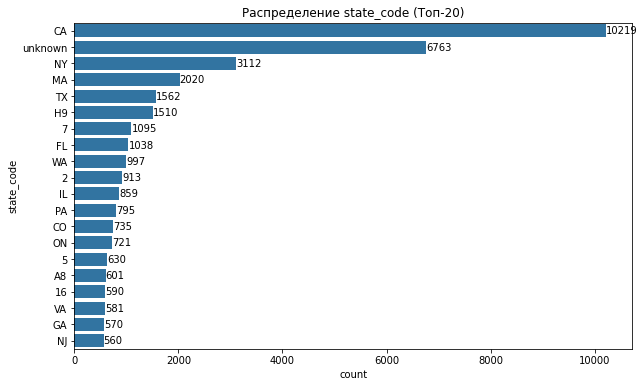

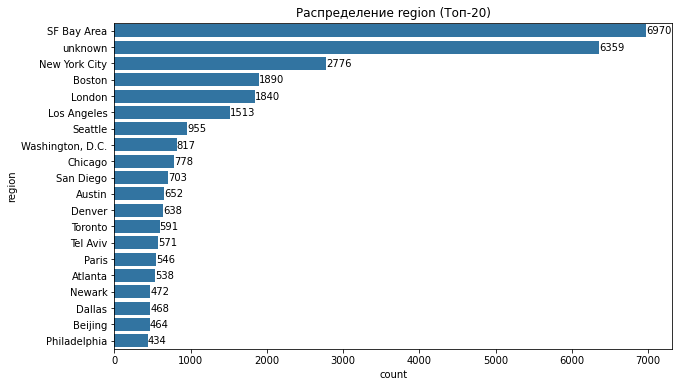

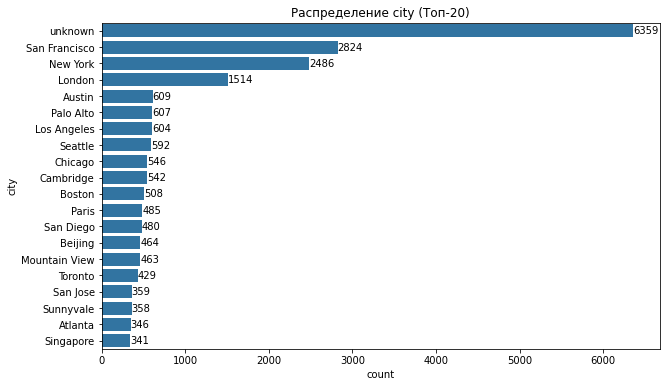

In [ ]:
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(
        y=startups_train[col],
        order=startups_train[col].value_counts().head(20).index  # Ограничиваем вывод 20 значениями
    )
    plt.title(f'Распределение {col} (Топ-20)')

    # Добавляем подписи к каждому столбцу вручную
    for p in ax.patches:
        width = p.get_width()  # Получаем ширину столбца (количество наблюдений)
        ax.text(
            width + 0.1,  # x-координата текста (немного правее столбца)
            p.get_y() + p.get_height() / 2,  # y-координата текста (по центру столбца)
            f'{int(width)}',  # Текст (количество наблюдений)
            va='center'  # Выравнивание по вертикали
        )

    plt.show()

- Целевой признак распределен неравномерно.
- Большинство стартапов имеют категорию `Software`, затем идут категории Mobile и Biotechnology.
- Наибольшее количество стартапов было открыто в странах: США,Великобритания, Канада, Индия, Китай.
- Наибольшее количество стартапов было открыто в городах: Сан-Франциско, Нью-Йорк, Лондон.

### Вывод

- Распределение признака общая сумма финансирования в USD показывает, что большинство стартапов получили относительно небольшие суммы финансирования, так как плотность значений сконцентрирована около нуля. Это указывает на значительную долю стартапов с низким уровнем привлеченных средств, что часто характерно для компаний на ранних стадиях развития. На графике наблюдаются редкие высокие значения, свидетельствующие о небольшом числе стартапов, получивших крупные инвестиции.
- Из рассмотрения года первого и последнего финансирования видно, что в датасете преимущественно представлены стартапы, открывшиеся и финансировавшиеся после 2012 года.
- Распределение времени существования стартапов (`lifetime`) показывает, что большинство стартапов имеют продолжительность жизни менее 2500 дней (около 7 лет). Пик плотности приходится на стартапы с относительно коротким сроком существования, что может указывать на высокую частоту закрытия на ранних этапах. Долгоживущие стартапы встречаются реже, а их распределение плавно уменьшается с увеличением времени жизни.
- Распределение количества раундов финансирования (`funding_rounds`) показывает, что большинство стартапов в тренировочном и тестовом наборах имеют менее пяти раундов. Пик плотности приходится на 1–3 раунда, что может указывать на то, что многие стартапы либо закрываются, либо достигают стабильности после нескольких раундов финансирования.
- Целевой признак распределен неравномерно.
- Большинство стартапов имеют категорию `Software`, затем идут категории Mobile и Biotechnology.
- Наибольшее количество стартапов было открыто в странах: США,Великобритания, Канада, Индия, Китай.
- Наибольшее количество стартапов было открыто в городах: Сан-Франциско, Нью-Йорк, Лондон.

## Разработка новых синтетических признаков

1. Период между раундами финансирования (`avg_time_between_rounds`).

- Вычислим среднее время между раундами финансирования, разделив общее время жизни компании (`lifetime`) на количество раундов (`funding_rounds`).

- Это может помочь понять, насколько регулярно компания привлекала финансирование.

In [ ]:
startups_train['avg_time_between_rounds'] = (
    startups_train['lifetime'] / startups_train['funding_rounds']).round().astype('int32')
#startups_test['avg_time_between_rounds'] = (
    #startups_test['lifetime'] / startups_test['funding_rounds']).round().astype('int32')

In [ ]:
startups_train

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime,avg_time_between_rounds
0,Lunchgate,Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2011-05-01,2014-12-01,2998,1499
1,EarLens,Manufacturing,42935020.0,operating,USA,CA,SF Bay Area,Redwood City,4,2010-05-04,2014-02-25,4748,1187
2,Reviva Pharmaceuticals,Biotechnology,35456380.0,operating,USA,CA,SF Bay Area,San Jose,3,2012-08-20,2014-07-02,4383,1461
3,Sancilio and Company,Health Care,22250000.0,operating,unknown,unknown,unknown,unknown,3,2011-09-01,2014-07-18,5114,1705
4,WireTough Cylinders,Manufacturing,9302247.0,operating,USA,VA,VA - Other,Bristol,1,2012-02-01,2012-02-01,2791,2791
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52511,Videostream,Entertainment,9302247.0,operating,CAN,ON,Toronto,Kitchener,1,2014-03-01,2014-03-01,2192,2192
52512,Hello Curry,Hospitality,500000.0,operating,IND,2,Hyderabad,Hyderabad,1,2014-03-07,2014-03-07,1590,1590
52513,Taskforce,Messaging,50000.0,operating,USA,CA,SF Bay Area,San Francisco,3,2009-06-14,2011-01-01,2741,914
52514,NetScaler,Security,13000000.0,operating,USA,CA,SF Bay Area,San Jose,6,1998-11-30,2004-03-01,7336,1223


2. Признак `lifetime_ratio` показывает, насколько время жизни стартапа (`ifetime`) отличается от продолжительности его финансирования (`funding_duration`). Если значение `lifetime_ratio` положительное, это означает, что стартап существовал дольше, чем длилось его финансирование. Если отрицательное — финансирование длилось дольше, чем время жизни стартапа.

In [ ]:
# Вычисляем разницу между 'last_funding_at' и 'first_funding_at'
startups_train['funding_duration'] = (
    pd.to_datetime(startups_train['last_funding_at']) -
    pd.to_datetime(startups_train['first_funding_at'])
).dt.days

# Вычисляем отношение 'lifetime' к 'funding_duration_years'
startups_train['lifetime_ratio'] = startups_train['lifetime'] - startups_train['funding_duration']
startups_train = startups_train.drop(columns=['funding_duration'])
startups_train

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime,avg_time_between_rounds,lifetime_ratio
0,Lunchgate,Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2011-05-01,2014-12-01,2998,1499,1688
1,EarLens,Manufacturing,42935020.0,operating,USA,CA,SF Bay Area,Redwood City,4,2010-05-04,2014-02-25,4748,1187,3355
2,Reviva Pharmaceuticals,Biotechnology,35456380.0,operating,USA,CA,SF Bay Area,San Jose,3,2012-08-20,2014-07-02,4383,1461,3702
3,Sancilio and Company,Health Care,22250000.0,operating,unknown,unknown,unknown,unknown,3,2011-09-01,2014-07-18,5114,1705,4063
4,WireTough Cylinders,Manufacturing,9302247.0,operating,USA,VA,VA - Other,Bristol,1,2012-02-01,2012-02-01,2791,2791,2791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52511,Videostream,Entertainment,9302247.0,operating,CAN,ON,Toronto,Kitchener,1,2014-03-01,2014-03-01,2192,2192,2192
52512,Hello Curry,Hospitality,500000.0,operating,IND,2,Hyderabad,Hyderabad,1,2014-03-07,2014-03-07,1590,1590,1590
52513,Taskforce,Messaging,50000.0,operating,USA,CA,SF Bay Area,San Francisco,3,2009-06-14,2011-01-01,2741,914,2175
52514,NetScaler,Security,13000000.0,operating,USA,CA,SF Bay Area,San Jose,6,1998-11-30,2004-03-01,7336,1223,5418


3. Новый признак `avg_funding_per_round` (среднее финансирование за раунд) рассчитывается как отношение общего объема финансирования стартапа (`funding_total_usd`) к количеству раундов финансирования (`funding_rounds`).

In [ ]:
startups_train['avg_funding_per_round'] = (
    startups_train['funding_total_usd'] / startups_train['funding_rounds']).round()
#startups_test['avg_funding_per_round'] = (
    #startups_test['funding_total_usd'] / startups_test['funding_rounds']).round()

4. Признак `freq_fund` (частота финансирования) рассчитывается как отношение общего объема финансирования стартапа (`funding_total_usd`) к продолжительности его существования (`lifetime`).

In [ ]:
startups_train['freq_fund'] = (startups_train['funding_total_usd'] / startups_train['lifetime']).round()
#startups_test['freq_fund'] = ( startups_test['funding_total_usd'] / startups_test['lifetime']).round()

В признаках `first_funding_at` и `last_funding_at` оставим только года.

In [ ]:
startups_train['first_funding_at'] = startups_train['first_funding_at'].dt.year
startups_train['last_funding_at'] = startups_train['last_funding_at'].dt.year
startups_train

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime,avg_time_between_rounds,lifetime_ratio,avg_funding_per_round,freq_fund
0,Lunchgate,Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2011,2014,2998,1499,1688,414313.0,276.0
1,EarLens,Manufacturing,42935020.0,operating,USA,CA,SF Bay Area,Redwood City,4,2010,2014,4748,1187,3355,10733755.0,9043.0
2,Reviva Pharmaceuticals,Biotechnology,35456380.0,operating,USA,CA,SF Bay Area,San Jose,3,2012,2014,4383,1461,3702,11818793.0,8090.0
3,Sancilio and Company,Health Care,22250000.0,operating,unknown,unknown,unknown,unknown,3,2011,2014,5114,1705,4063,7416667.0,4351.0
4,WireTough Cylinders,Manufacturing,9302247.0,operating,USA,VA,VA - Other,Bristol,1,2012,2012,2791,2791,2791,9302247.0,3333.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52511,Videostream,Entertainment,9302247.0,operating,CAN,ON,Toronto,Kitchener,1,2014,2014,2192,2192,2192,9302247.0,4244.0
52512,Hello Curry,Hospitality,500000.0,operating,IND,2,Hyderabad,Hyderabad,1,2014,2014,1590,1590,1590,500000.0,314.0
52513,Taskforce,Messaging,50000.0,operating,USA,CA,SF Bay Area,San Francisco,3,2009,2011,2741,914,2175,16667.0,18.0
52514,NetScaler,Security,13000000.0,operating,USA,CA,SF Bay Area,San Jose,6,1998,2004,7336,1223,5418,2166667.0,1772.0


In [ ]:
startups_test['last_funding_at'] = startups_test['last_funding_at'].dt.year
startups_test['first_funding_at'] = startups_test['first_funding_at'].dt.year
startups_test

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,unknown,unknown,1,2009,2009,3501
1,JBI Fish & Wings,Hospitality,8307624.0,USA,TN,TN - Other,Humboldt,1,2010,2010,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014,2014,1295
3,Imagine Communications,Software,34700000.0,USA,CA,San Diego,San Diego,4,2005,2010,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007,2007,6209
...,...,...,...,...,...,...,...,...,...,...,...
13120,Jymob,Recruiting,28000.0,USA,CA,SF Bay Area,Sunnyvale,1,2012,2012,2267
13121,GlobaTrek,Software,8307624.0,USA,CA,SF Bay Area,Mountain View,1,2013,2013,2192
13122,Inkd.com,E-Commerce,5600000.0,USA,WA,Seattle,Seattle,3,2008,2011,2922
13123,AdWill,Mobile,150000.0,USA,NY,New York City,New York,2,2014,2014,1386


### Вывод

Создали новые признаки:
- `avg_time_between_rounds`
- `lifetime_ratio`
- `avg_funding_per_round`
- `freq_fund`

В признаках `first_funding_at` и `last_funding_at` оставили только года.

## Проверка на мультиколлинеарность

Для установления корреляций между целевым параметром - статусом стартапа (закрыт или действующий) и остальными признаками воспользуемся корреляцией Phi_K. Построим матрицу корреляций Phi_K.

In [ ]:
interval = ['funding_total_usd', 'lifetime', 'avg_time_between_rounds', 'lifetime_ratio', 'avg_funding_per_round', 'freq_fund']

In [ ]:
startups_train_phik = startups_train.drop(['name', 'state_code', 'region'], axis=1)

In [ ]:
phik_startups_train = startups_train_phik.phik_matrix(interval_cols=interval)

In [ ]:
phik_startups_train

,category_list,funding_total_usd,status,country_code,city,funding_rounds,first_funding_at,last_funding_at,lifetime,avg_time_between_rounds,lifetime_ratio,avg_funding_per_round,freq_fund
category_list,1.000000,0.000000,0.231657,0.559804,0.971857,0.000000,0.316985,0.189781,0.366634,0.229856,0.338284,0.000000,0.000000
funding_total_usd,0.000000,1.000000,0.000000,0.000000,0.000000,0.324087,0.108575,0.055955,0.103176,0.071898,0.075404,0.819290,0.795486
status,0.231657,0.000000,1.000000,0.228218,0.135046,0.100557,0.205714,0.258342,0.535217,0.343032,0.519846,0.000000,0.000000
country_code,0.559804,0.000000,0.228218,1.000000,0.999942,0.067751,0.157686,0.082652,0.243618,0.162303,0.177801,0.000000,0.000000
city,0.971857,0.000000,0.135046,0.999942,1.000000,0.000000,0.464573,0.537400,0.647897,0.659053,0.580041,0.000000,0.000000
funding_rounds,0.000000,0.324087,0.100557,0.067751,0.000000,1.000000,0.297841,0.162759,0.227475,0.407694,0.094705,0.000000,0.228722
first_funding_at,0.316985,0.108575,0.205714,0.157686,0.464573,0.297841,1.000000,0.998388,0.688386,0.497686,0.557029,0.170109,0.053997
last_funding_at,0.189781,0.055955,0.258342,0.082652,0.537400,0.162759,0.998388,1.000000,0.583075,0.618059,0.617221,0.060221,0.000000
lifetime,0.366634,0.103176,0.535217,0.243618,0.647897,0.227475,0.688386,0.583075,1.000000,0.987045,0.961186,0.067375,0.034271
avg_time_between_rounds,0.229856,0.071898,0.343032,0.162303,0.659053,0.407694,0.497686,0.618059,0.987045,1.000000,0.953795,0.053257,0.000000


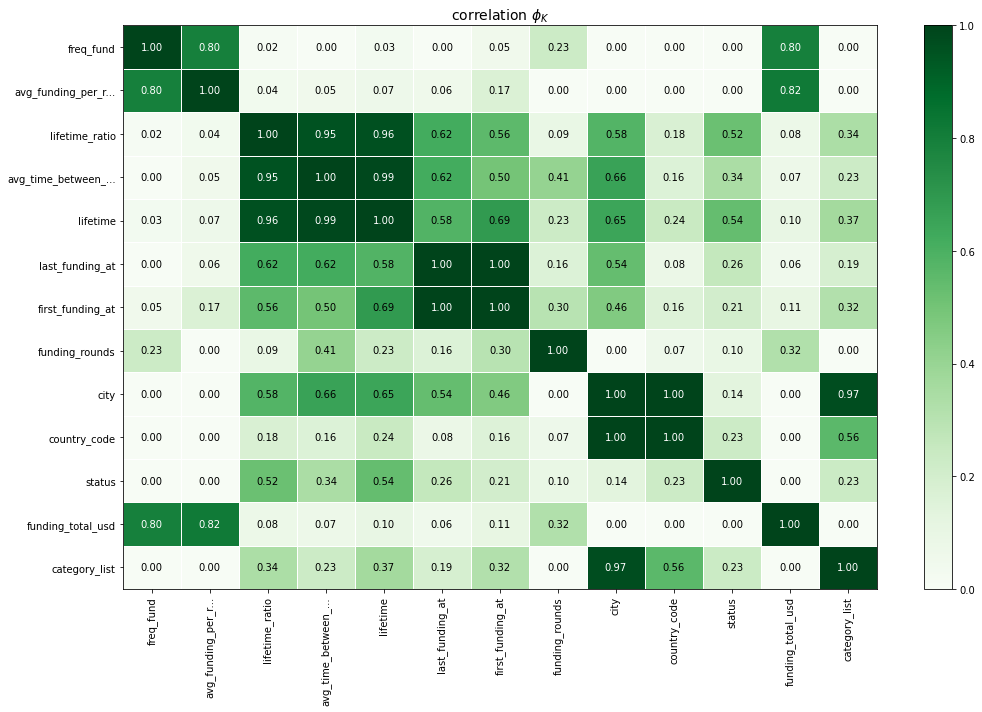

In [ ]:
plot_correlation_matrix(phik_startups_train.values,
                        x_labels=phik_startups_train.columns,
                        y_labels=phik_startups_train.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=1,
                        figsize=(15, 10))

In [ ]:
startups_train.columns

Index(['name', 'category_list', 'funding_total_usd', 'status', 'country_code',
       'state_code', 'region', 'city', 'funding_rounds', 'first_funding_at',
       'last_funding_at', 'lifetime', 'avg_time_between_rounds',
       'lifetime_ratio', 'avg_funding_per_round', 'freq_fund'],
      dtype='object')

- С целевым признаком `status` наблюдается корреляция признаков по убыванию: `lifetime`, `lifetime_ratio`, `avg_time_between_rounds`, `last_funding_at`, `country_code`, `category_list`, `first_funding_at`, `city`, `funding_round`.
- Есть сильная корреляция между признаками `lifetime_ratio`, `avg_time_between_rounds`, `lifetime`. Между `city` и `country_code`, `category_list`. Между `last_funding_at` и `first_funding_at`.
- Параметры `freq_fund`, `avg_funding_per_round` и `funding_total_usd` не коррелируют с целевым признаком.

Для дальнейшего рассмотрения оставим признаки `category_list`, `funding_total_usd`, `status`, `country_code`, `funding_rounds`, `last_funding_at`, `lifetime`, но перед этим посмотрим распределение стартапов по городам.

In [ ]:
city_counts = startups_train['city'].value_counts()
cities_with_one_occurrence = city_counts[city_counts < 2]
# Количество городов, которые встречаются ровно один раз
num_cities_with_one_occurrence = cities_with_one_occurrence.count()

# Вывод количества
print(num_cities_with_one_occurrence)
city_counts.head(10)

2304


city
unknown          6359
San Francisco    2824
New York         2486
London           1514
Austin            609
Palo Alto         607
Los Angeles       604
Seattle           592
Chicago           546
Cambridge         542
Name: count, dtype: int64

В трех городах (San Francisco, New York, London) отмечается значительное число стартапов. Вставим названия этих городов в столбец `country_code` для отдельного рассмотрения по ним судеб стартапов.

In [ ]:
# Заменяем 'country_code' на 'city' для указанных городов
cities_to_replace = ['San Francisco', 'New York', 'London']
startups_train.loc[startups_train['city'].isin(cities_to_replace), 'country_code'] = startups_train['city']

# Результат
startups_train

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime,avg_time_between_rounds,lifetime_ratio,avg_funding_per_round,freq_fund
0,Lunchgate,Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2011,2014,2998,1499,1688,414313.0,276.0
1,EarLens,Manufacturing,42935020.0,operating,USA,CA,SF Bay Area,Redwood City,4,2010,2014,4748,1187,3355,10733755.0,9043.0
2,Reviva Pharmaceuticals,Biotechnology,35456380.0,operating,USA,CA,SF Bay Area,San Jose,3,2012,2014,4383,1461,3702,11818793.0,8090.0
3,Sancilio and Company,Health Care,22250000.0,operating,unknown,unknown,unknown,unknown,3,2011,2014,5114,1705,4063,7416667.0,4351.0
4,WireTough Cylinders,Manufacturing,9302247.0,operating,USA,VA,VA - Other,Bristol,1,2012,2012,2791,2791,2791,9302247.0,3333.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52511,Videostream,Entertainment,9302247.0,operating,CAN,ON,Toronto,Kitchener,1,2014,2014,2192,2192,2192,9302247.0,4244.0
52512,Hello Curry,Hospitality,500000.0,operating,IND,2,Hyderabad,Hyderabad,1,2014,2014,1590,1590,1590,500000.0,314.0
52513,Taskforce,Messaging,50000.0,operating,San Francisco,CA,SF Bay Area,San Francisco,3,2009,2011,2741,914,2175,16667.0,18.0
52514,NetScaler,Security,13000000.0,operating,USA,CA,SF Bay Area,San Jose,6,1998,2004,7336,1223,5418,2166667.0,1772.0


In [ ]:
# Заменяем 'country_code' на 'city' для указанных городов
startups_test.loc[startups_train['city'].isin(cities_to_replace), 'country_code'] = startups_test['city']

# Результат
startups_test

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,unknown,unknown,1,2009,2009,3501
1,JBI Fish & Wings,Hospitality,8307624.0,USA,TN,TN - Other,Humboldt,1,2010,2010,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014,2014,1295
3,Imagine Communications,Software,34700000.0,USA,CA,San Diego,San Diego,4,2005,2010,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007,2007,6209
...,...,...,...,...,...,...,...,...,...,...,...
13120,Jymob,Recruiting,28000.0,USA,CA,SF Bay Area,Sunnyvale,1,2012,2012,2267
13121,GlobaTrek,Software,8307624.0,USA,CA,SF Bay Area,Mountain View,1,2013,2013,2192
13122,Inkd.com,E-Commerce,5600000.0,USA,WA,Seattle,Seattle,3,2008,2011,2922
13123,AdWill,Mobile,150000.0,USA,NY,New York City,New York,2,2014,2014,1386


In [ ]:
phik_startups_train.columns

Index(['category_list', 'funding_total_usd', 'status', 'country_code', 'city',
       'funding_rounds', 'first_funding_at', 'last_funding_at', 'lifetime',
       'avg_time_between_rounds', 'lifetime_ratio', 'avg_funding_per_round',
       'freq_fund'],
      dtype='object')

In [ ]:
startups_train_phik = startups_train.drop(['name', 'state_code',
                                           'region', 'city', 'avg_time_between_rounds',
                                           'lifetime_ratio', 'avg_funding_per_round',
                                           'freq_fund', 'first_funding_at'], axis=1)

In [ ]:
phik_startups_train = startups_train_phik.phik_matrix(interval_cols=interval)

In [ ]:
phik_startups_train

,category_list,funding_total_usd,status,country_code,funding_rounds,last_funding_at,lifetime
category_list,1.000000,0.000000,0.231657,0.577429,0.000000,0.189781,0.366634
funding_total_usd,0.000000,1.000000,0.000000,0.000000,0.324087,0.055955,0.103176
status,0.231657,0.000000,1.000000,0.232245,0.100557,0.258342,0.535217
country_code,0.577429,0.000000,0.232245,1.000000,0.089178,0.108605,0.271360
funding_rounds,0.000000,0.324087,0.100557,0.089178,1.000000,0.162759,0.227475
last_funding_at,0.189781,0.055955,0.258342,0.108605,0.162759,1.000000,0.583075
lifetime,0.366634,0.103176,0.535217,0.271360,0.227475,0.583075,1.000000


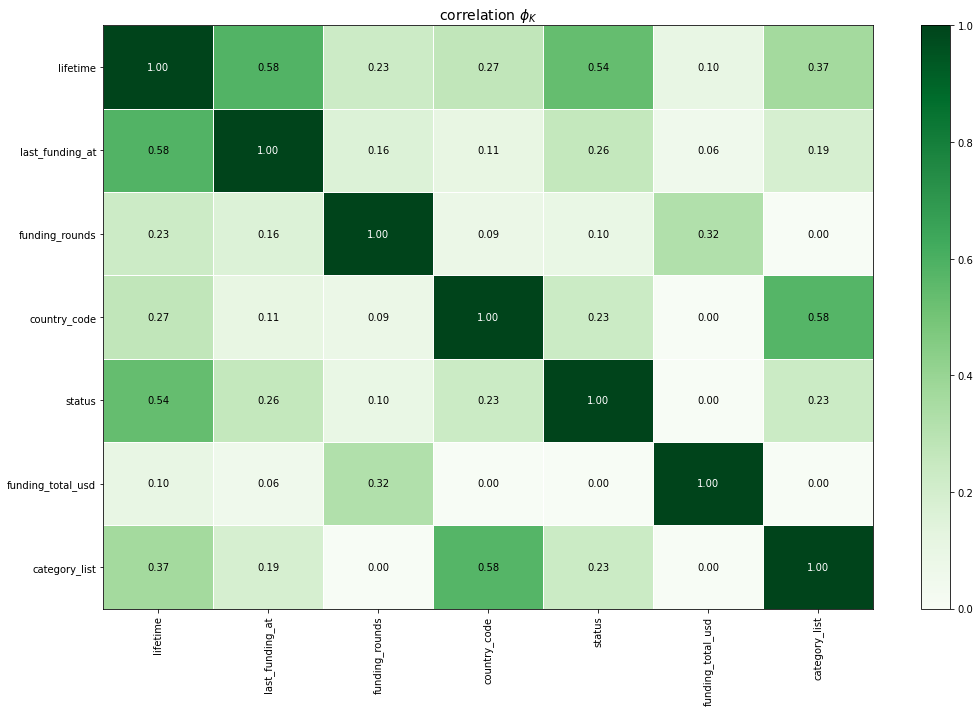

In [ ]:
plot_correlation_matrix(phik_startups_train.values,
                        x_labels=phik_startups_train.columns,
                        y_labels=phik_startups_train.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=1,
                        figsize=(15, 10))

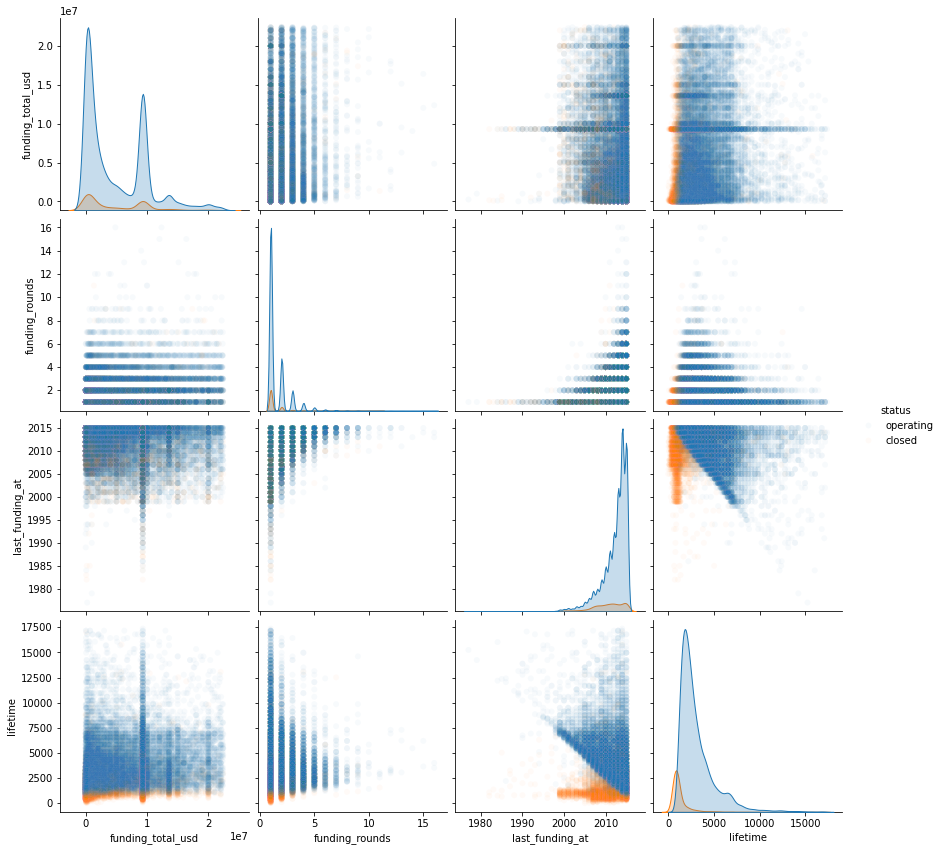

In [ ]:
# Вычислим межквартильный размах (IQR) для столбца funding_total_usd
Q1 = startups_train_phik['funding_total_usd'].quantile(0.25)
Q3 = startups_train_phik['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1

# Определим границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные, убирая выбросы только в столбце funding_total_usd
filtered_data = startups_train_phik[
    (startups_train_phik['funding_total_usd'] >= lower_bound) &
    (startups_train_phik['funding_total_usd'] <= upper_bound)
]

# Теперь строим парные графики на отфильтрованных данных
_ = sns.pairplot(filtered_data, hue='status', height=3, plot_kws={'alpha': 0.03})

# Покажите график
plt.show()

- Большинство компаний имеют небольшой размер финансирования, в то время как лишь несколько компаний получают значительные инвестиции.
- Компании с большим количеством раундов финансирования, как правило, имеют более высокий уровень финансирования и последнее финансирование произошло позже.
- У действующих компаний, как правило, последнее финансирование произошло позже, чем у закрывшихся компаний.
- Большинство компаний имеют ограниченный срок жизни, хотя есть и некоторые компании, существующие очень долго.
- Закрывшиеся компании, как правило, имеют более короткий срок жизни, чем действующие компании.

### Вывод

- С целевым признаком `status` наблюдается корреляция признаков по убыванию: `lifetime`, `lifetime_ratio`, `avg_time_between_rounds`, `last_funding_at`, `country_code`, `category_list`, `first_funding_at`, `city`, `funding_round`.
- Есть сильная корреляция между признаками `lifetime_ratio`, `avg_time_between_rounds`, `lifetime`. Между `city` и `country_code`, `category_list`. Между `last_funding_at` и `first_funding_at`.
- Параметры `freq_fund`, `avg_funding_per_round` и `funding_total_usd` не коррелируют с целевым признаком.
- Для дальнейшего рассмотрения оставим признаки `category_list`, `funding_total_usd`, `status`, `country_code`, `funding_rounds`, `last_funding_at`, `lifetime`.
- В трех городах (San Francisco, New York, London) отмечается значительное число стартапов. Вставим названия этих городов в столбец `country_code` для отдельного рассмотрения по ним судеб стартапов.
- Компании с более высоким объемом финансирования и большим количеством раундов финансирования, как правило, имеют более высокий шанс на успех и остаются действующими.
- Время последнего раунда финансирования также может быть важным показателем.

## Отбор финального набора обучающих признаков

- С целевым признаком `status` наблюдается корреляция признаков по убыванию: `lifetime`, `lifetime_ratio`, `avg_time_between_rounds`, `last_funding_at`, `country_code`, `category_list`, `first_funding_at`, `city`, `funding_round`.
- Есть сильная корреляция между признаками `lifetime_ratio`, `avg_time_between_rounds`, `lifetime`. Между `city` и `country_code`, `category_list`. Между `last_funding_at` и `first_funding_at`.
- Параметры `freq_fund`, `avg_funding_per_round` и `funding_total_usd` не коррелируют с целевым признаком.

Для дальнейшего рассмотрения оставим признаки `category_list`, `funding_total_usd`, `status`, `country_code`, `funding_rounds`, `last_funding_at`, `lifetime`.

In [ ]:
train = startups_train.drop(['name', 'city', 'state_code', 'region', 'first_funding_at', 'avg_time_between_rounds', 'avg_funding_per_round', 'freq_fund', 'lifetime_ratio'], axis=1)
train.head()

,category_list,funding_total_usd,status,country_code,funding_rounds,last_funding_at,lifetime
0,Restaurants,828626.0,operating,CHE,2,2014,2998
1,Manufacturing,42935020.0,operating,USA,4,2014,4748
2,Biotechnology,35456380.0,operating,USA,3,2014,4383
3,Health Care,22250000.0,operating,unknown,3,2014,5114
4,Manufacturing,9302247.0,operating,USA,1,2012,2791


In [ ]:
test = startups_test.drop(['name', 'city', 'state_code', 'region', 'first_funding_at'], axis=1)
test.head()

,category_list,funding_total_usd,country_code,funding_rounds,last_funding_at,lifetime
0,Clean Technology,2819200.0,NIC,1,2009,3501
1,Hospitality,8307624.0,USA,1,2010,2717
2,Finance,428257.0,LUX,2,2014,1295
3,Software,34700000.0,USA,4,2010,4748
4,Software,4530000.0,CAN,1,2007,6209


### Вывод

Для дальнейшего рассмотрения оставим признаки `category_list`, `funding_total_usd`, `status`, `country_code`, `funding_rounds`, `last_funding_at`, `lifetime`.

## Выбор и обучение моделей

В качестве метрики будем использовать метрику F1-Score. F1-мера вычисляется на основе точности p и полноты r. Точность - это отношение true positives (tp) ко всем predicted positives (tp + fp). Полнота это отношение true positives ко всем actual positives (tp + fn). Метрика F1 является гармоническим средним между Recall и Precision. Хорошая модель при обучении будет максимизировать Recall и Precision одновременно. Таким образом, умеренно хорошие показатели по обоим параметрам будут предпочтительнее, чем чрезвычайно хорошие показатели по одному и плохие по другому.

In [ ]:
encoder = LabelEncoder()
Y = train['status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
train.drop(
['status'],
axis=1
),
Y,
test_size = TEST_SIZE,
random_state = RANDOM_STATE,
stratify = Y
)

In [ ]:
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
# создаём списки с названиями признаков
ohe_columns = [ 'category_list', 'country_code']
ord_columns = ['funding_rounds', 'last_funding_at']
num_columns = ['funding_total_usd', 'lifetime']

In [ ]:
num_pipe = Pipeline(
    [('sc', MinMaxScaler()),
     ('num_fill_pipe', SimpleImputer(missing_values=np.nan, strategy='mean'))
    ]
    )

In [ ]:
ord_pipe = Pipeline(
    [
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('ord_fill_pipe', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [ ]:
ohe_pipe = Pipeline(
    [
        ('none_fill_pipe', SimpleImputer(missing_values=np.nan,strategy='constant',\
                                    fill_value = 'unknown')  ),
        ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='infrequent_if_exist'))
    ]
    )

In [ ]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', num_pipe, num_columns)
    ],
    remainder='passthrough'
)

# создаем итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),

        ('models', DecisionTreeClassifier( random_state=RANDOM_STATE, \
                     max_depth = 5, max_features = 25, min_samples_leaf = 3)  )

    ]
)

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': [0.01, 0.1, 1, 10, 100, 1000],
        #'models__max_iter': [100, 200, 300],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]


In [ ]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring="f1",
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train, y_train)

best_model = randomized_search.best_estimator_

print('Лучшая модель и её параметры:\n\n', best_model)
print('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

y_test_pred = randomized_search.predict(X_test)
print(f'Метрика f1 на тестовой выборке: {f1_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('none_fill_pipe',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False))]),
                                                  ['category_list',
                                                   'country_code

### Вывод

- Лучшая модель: `LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear'))]`
- Метрика лучшей модели на тренировочной выборке: `0.9803294726936936`
- Метрика `f1` на тестовой выборке: `0.9795176742649488`

## Итоговая оценка качества предсказания лучшей модели

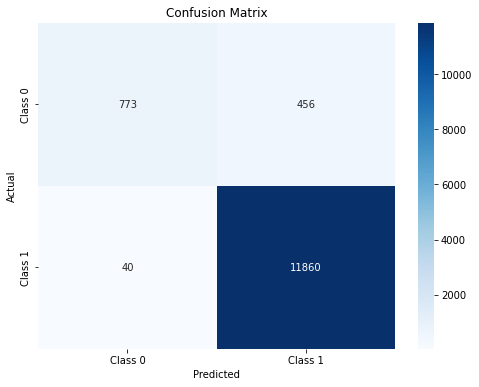

In [ ]:
# Построение confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Визуализация confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Метрика F1 на валидационной выборке показала 98.06%.

Обратим внимание на матрицу ошибок:

- истинно положительные предсказания (стартап работает и модель права): 11 860
- ложноположительные предсказания (стартап закрылся и модель ошиблась): 456
- истинно отрицательные предсказания (стартап закрылся и модель права): 773
- ложноотрицательные предсказания (стартап работает и модель ошиблась): 40

Попробуем протестировать различные пороги, чтобы найти оптимальный, который минимизирует FP.

In [ ]:
y_prob = best_model.predict_proba(X_test)[:, 1]
thresholds = [0.5, 0.6, 0.65, 0.66, 0.67, 0.7]
for threshold in thresholds:
    y_pred_thresholded = (y_prob >= threshold).astype(int)
    print(f'Метрика f1 при пороге {threshold}: {f1_score(y_test, y_pred_thresholded)}')

Метрика f1 при пороге 0.5: 0.9795176742649488
Метрика f1 при пороге 0.6: 0.9815889865649361
Метрика f1 при пороге 0.65: 0.9820478723404256
Метрика f1 при пороге 0.66: 0.9820827270837663
Метрика f1 при пороге 0.67: 0.9819512600848374
Метрика f1 при пороге 0.7: 0.9813395534821726


In [ ]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
threshold = 0.66  # Новый порог
y_pred = (y_pred_proba >= threshold).astype(int)

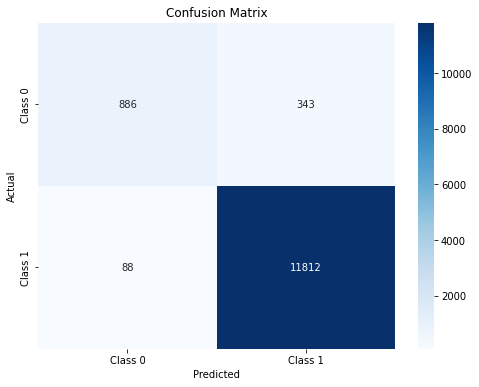

In [ ]:
# Построение confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализация confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Выбран порог классификации - 0.66.

Матрица ошибок:
- истинно положительные предсказания (стартап работает и модель права): 11 812
- ложноположительные предсказания (стартап закрылся и модель ошиблась): 343
- истинно отрицательные предсказания (стартап закрылся и модель права): 886
- ложноотрицательные предсказания (стартап работает и модель ошиблась): 88

### Вывод

Выбран порог классификации - 0.66.

Матрица ошибок:
- истинно положительные предсказания (стартап работает и модель права): 11 812
- ложноположительные предсказания (стартап закрылся и модель ошиблась): 343
- истинно отрицательные предсказания (стартап закрылся и модель права): 886
- ложноотрицательные предсказания (стартап работает и модель ошиблась): 88

## Анализ важности признаков лучшей модели

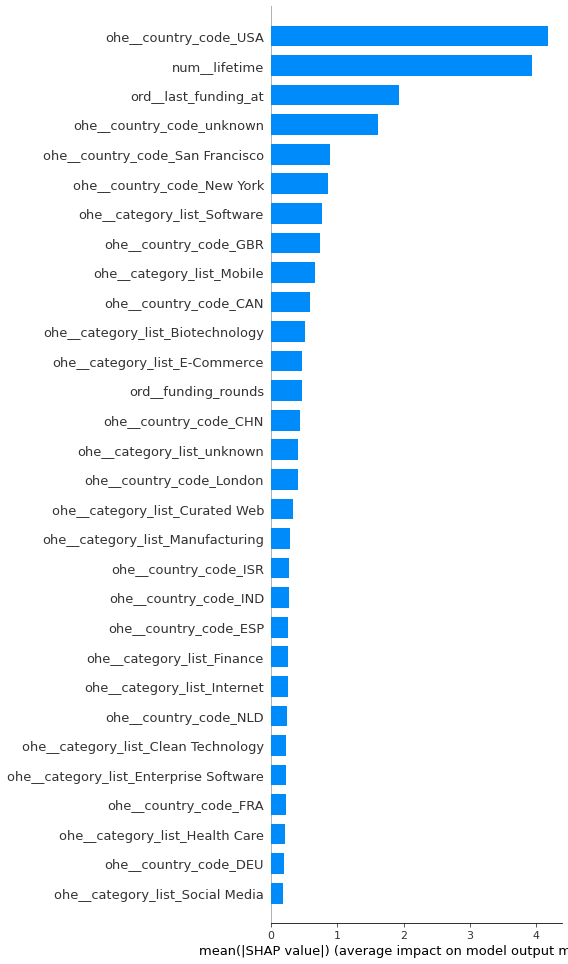

<Figure size 1800x1440 with 0 Axes>

In [ ]:
# Преобразуем тренировочные данные
X_train_transformed = best_model.named_steps['preprocessor'].fit_transform(X_train)

# Инициализация SHAP explainer
explainer = shap.Explainer(
    best_model.named_steps['models'],
    X_train_transformed  # Используем уже преобразованные данные
)

# Преобразуем тестовые данные
X_test_transformed = best_model.named_steps['preprocessor'].transform(X_test)
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
X_test_transformed = pd.DataFrame(X_test_transformed, columns=feature_names)

# Вычисление SHAP значений
shap_values = explainer.shap_values(X_test_transformed)

# Построение графиков SHAP
shap.summary_plot(shap_values, X_test_transformed, plot_type="bar", max_display=30, show=False)
plt.figure(figsize=(25, 20))
plt.show()

- Компании, расположенные в США, существенно влияют на предсказания модели.
- Время последнего раунда финансирования и время существования стартапа являются еще одним важным фактором.
- Города Сан-Франциско и Нью-Йорк также имеют значительное влияние, что свидетельствует о том, что географическое положение играет ключевую роль в предсказаниях модели.
- Характеристики, относящиеся к категории компании, такие как `Software`, `Mobile` и `Biotechnology`, также влияют на предсказания модели, что указывает на важность индустрии компании.

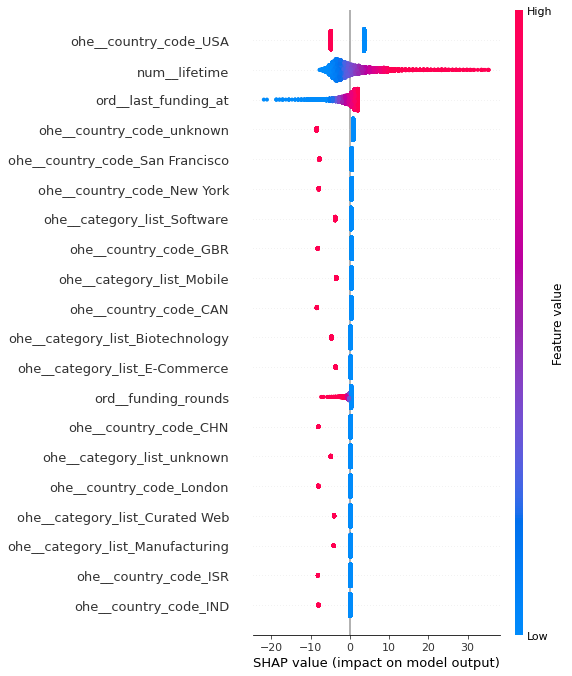

In [ ]:
# Визуализируем важность признаков
shap.summary_plot(shap_values, X_test_transformed, feature_names=best_model.named_steps['preprocessor'].get_feature_names_out())

Самые значимые факторы: `ohe_country_code_USA`, `ord_last_funding_at`, `num_lifetime`.

Страны USA, CAN, GBR и города San Francisco и New York имеют положительное влияние на результат. Это означает, что компании из этих стран более успешны.

Срок жизни компании (`num_lifetime`) также положительно влияет на результат. Чем больше срок жизни, тем успешнее компания.

Фактор `ord_last_funding_at` - стартапы с более свежими раундами финансирования, как правило, более успешны.

Фактор `ord_funding_rounds`: Большое количество раундов финансирования может быть позитивным индикатором.

Категории `Software`, `Mobile` и `Biotechnology` показывает слабо положительный эффект.

### Вывод

- Страны USA, CAN, GBR и города San Francisco и New York имеют положительное влияние на результат. Это означает, что компании из этих стран более успешны.
- Срок жизни компании (`num_lifetime`) также положительно влияет на результат. Чем больше срок жизни, тем успешнее компания.
- Фактор `ord_last_funding_at` - стартапы с более свежими раундами финансирования, как правило, более успешны.
- Фактор `ord_funding_rounds`: Большое количество раундов финансирования может быть позитивным индикатором.
- Категории `Software`, `Mobile` и `Biotechnology` показывает слабо положительный эффект.

## Итоговая таблица с предсказаниями

In [ ]:
y_pred_final = best_model.predict_proba(test)[:, 1]
y_pred_final_table = (y_pred_final >= threshold).astype(int)

In [ ]:
y_pred_final_table

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
final_table = startups_test.drop(
['category_list', 'funding_total_usd', 'country_code',
       'state_code', 'region', 'city', 'funding_rounds', 'first_funding_at',
       'last_funding_at', 'lifetime'],
axis=1
)

In [ ]:
final_table

,name
0,Crystalsol
1,JBI Fish & Wings
2,COINPLUS
3,Imagine Communications
4,DNA13
...,...
13120,Jymob
13121,GlobaTrek
13122,Inkd.com
13123,AdWill


In [ ]:
final_table['status'] = y_pred_final_table

In [ ]:
display(final_table)

,name,status
0,Crystalsol,1
1,JBI Fish & Wings,1
2,COINPLUS,1
3,Imagine Communications,1
4,DNA13,1
...,...,...
13120,Jymob,1
13121,GlobaTrek,1
13122,Inkd.com,1
13123,AdWill,1


In [ ]:
final_table['status'] = final_table['status'].apply(lambda x: 'operating' if x == 1 else 'closed')

In [ ]:
display(final_table)

,name,status
0,Crystalsol,operating
1,JBI Fish & Wings,operating
2,COINPLUS,operating
3,Imagine Communications,operating
4,DNA13,operating
...,...,...
13120,Jymob,operating
13121,GlobaTrek,operating
13122,Inkd.com,operating
13123,AdWill,operating


In [ ]:
df = pd.DataFrame(final_table)

In [ ]:
df.to_csv('output.csv', index=False)

## Отчет по исследованию

**Целью проекта было:**

- Разработать модель машинного обучения для предсказания продолжения деятельности стартапа.
- Провести полноценный разведочный анализ и сформировать рекомендации будущим создателям стартапов (какие факторы влияют на успешность стартапа).


**Проделаны следующие этапы:**

1. Загрузка и ознакомление с данными
2. Предварительная обработка
3. Полноценный разведочный анализ
4. Разработка новых синтетических признаков
5. Проверка на мультиколлинеарность
6. Отбор финального набора обучающих признаков
7. Выбор и обучение моделей
8. Итоговая оценка качества предсказания лучшей модели
9. Анализ важности ее признаков
10. Подготовка отчета по исследованию

**На каждом этапе достигнуты следующие результаты:**

**Предобработка данных**
- Уникальные значения параметра `category_list` сократили с 22195 и 6206 до 521 и 345 соответственно, путем вывода основной категории стартапа.
- Признаки `closed_at` и `founded_at` заменили на признак `lifetime`.
- В `funding_total_usd` заполнили пропуски средним значением, сгруппированным по признаку `funding_rounds`.
- Пропуски параметров `name`, `category_list`, `country_code`, `state_code`, `region и city` заполнили заглушкой.

**Анализ данных**
- Распределение признака общая сумма финансирования в USD показывает, что большинство стартапов получили относительно небольшие суммы финансирования, так как плотность значений сконцентрирована около нуля. Это указывает на значительную долю стартапов с низким уровнем привлеченных средств, что часто характерно для компаний на ранних стадиях развития. На графике наблюдаются редкие высокие значения, свидетельствующие о небольшом числе стартапов, получивших крупные инвестиции.
- Из рассмотрения года первого и последнего финансирования видно, что в датасете преимущественно представлены стартапы, открывшиеся и финансировавшиеся после 2012 года.
- Распределение времени существования стартапов (`lifetime`) показывает, что большинство стартапов имеют продолжительность жизни менее 2500 дней (около 7 лет). Пик плотности приходится на стартапы с относительно коротким сроком существования, что может указывать на высокую частоту закрытия на ранних этапах. Долгоживущие стартапы встречаются реже, а их распределение плавно уменьшается с увеличением времени жизни.
- Распределение количества раундов финансирования (`funding_rounds`) показывает, что большинство стартапов в тренировочном и тестовом наборах имеют менее пяти раундов. Пик плотности приходится на 1–3 раунда, что может указывать на то, что многие стартапы либо закрываются, либо достигают стабильности после нескольких раундов финансирования.
- Целевой признак распределен неравномерно.
- Большинство стартапов имеют категорию `Software`, затем идут категории Mobile и Biotechnology.
- Наибольшее количество стартапов было открыто в странах: США,Великобритания, Канада, Индия, Китай.
- Наибольшее количество стартапов было открыто в городах: Сан-Франциско, Нью-Йорк, Лондон.

**Разработка новых синтетических признаков**

Создали новые признаки:
- `avg_time_between_rounds`
- `lifetime_ratio`
- `avg_funding_per_round`
- `freq_fund`

В признаках `first_funding_at` и `last_funding_at` оставили только года.

**Проверка на мультиколлинеарность**

- С целевым признаком `status` наблюдается корреляция признаков по убыванию: `lifetime`, `lifetime_ratio`, `avg_time_between_rounds`, `last_funding_at`, `country_code`, `category_list`, `first_funding_at`, `city`, `funding_round`.
- Есть сильная корреляция между признаками `lifetime_ratio`, `avg_time_between_rounds`, `lifetime`. Между `city` и `country_code`, `category_list`. Между `last_funding_at` и `first_funding_at`.
- Параметры `freq_fund`, `avg_funding_per_round` и `funding_total_usd` не коррелируют с целевым признаком.
- В трех городах (San Francisco, New York, London) отмечается значительное число стартапов. Вставили названия этих городов в столбец `country_code` для отдельного рассмотрения по ним судеб стартапов.

**Отбор финального набора обучающих признаков**
- Для дальнейшего рассмотрения оставим признаки `category_list`, `funding_total_usd`, `status`, `country_code`, `funding_rounds`, `last_funding_at`, `lifetime`.

**Выбор и обучение моделей**
- Лучшая модель: `LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear'))]`
- Метрика лучшей модели на тренировочной выборке: `0.9803294726936936`
- Метрика `f1` на тестовой выборке: `0.9795176742649488`

**Итоговая оценка качества предсказания лучшей модели**

Выбран порог классификации - 0.66.

Матрица ошибок:
- истинно положительные предсказания (стартап работает и модель права): 11 812
- ложноположительные предсказания (стартап закрылся и модель ошиблась): 343
- истинно отрицательные предсказания (стартап закрылся и модель права): 886
- ложноотрицательные предсказания (стартап работает и модель ошиблась): 88

**Анализ важности ее признаков**
- Страна USA, CAN, GBR и города San Francisco и New York имеют положительное влияние на результат. Это означает, что компании из этих стран более успешны.
- Срок жизни компании (`num_lifetime`) также положительно влияет на результат. Чем больше срок жизни, тем успешнее компания.
- Фактор `ord_last_funding_at` - стартапы с более свежими раундами финансирования, как правило, более успешны.
- Фактор `ord_funding_rounds`: Большое количество раундов финансирования может быть позитивным индикатором.
- Категории `Software`, `Mobile` и `Biotechnology` показывает слабо положительный эффект.

**Рекомендации:**

Ориентирование на рынок США существенно увеличивает шансы на успех. Длительный срок жизни стартапов и регулярные раунды финансирования в них способствуют их долгосрочному росту. Рассмотрение ключевых отраслей: `Software`, `Mobile` и `Biotechnology`.